In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, r2_score, confusion_matrix

In [23]:
df = pd.read_csv("../Datasets/california_housing_prices.csv")

In [24]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
classfication_columns = df.select_dtypes(include='object').columns
numeric_columns = df.select_dtypes(include='number').columns

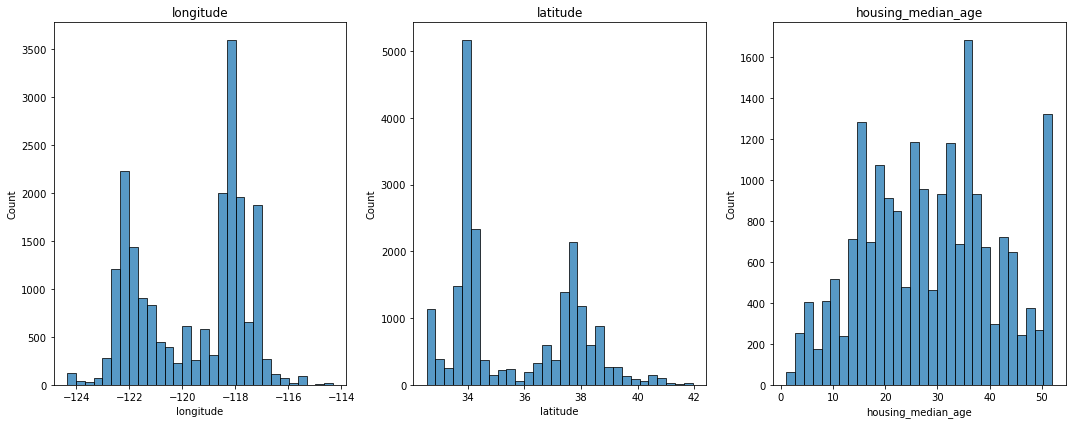

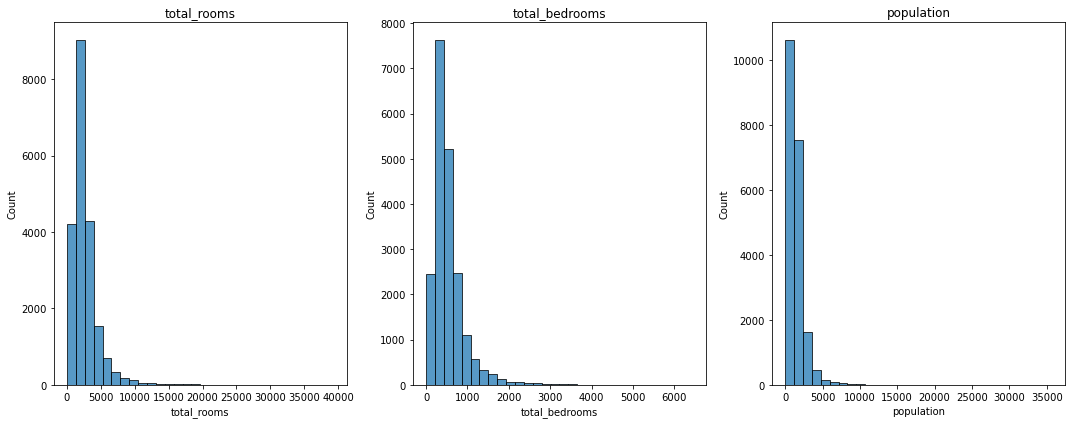

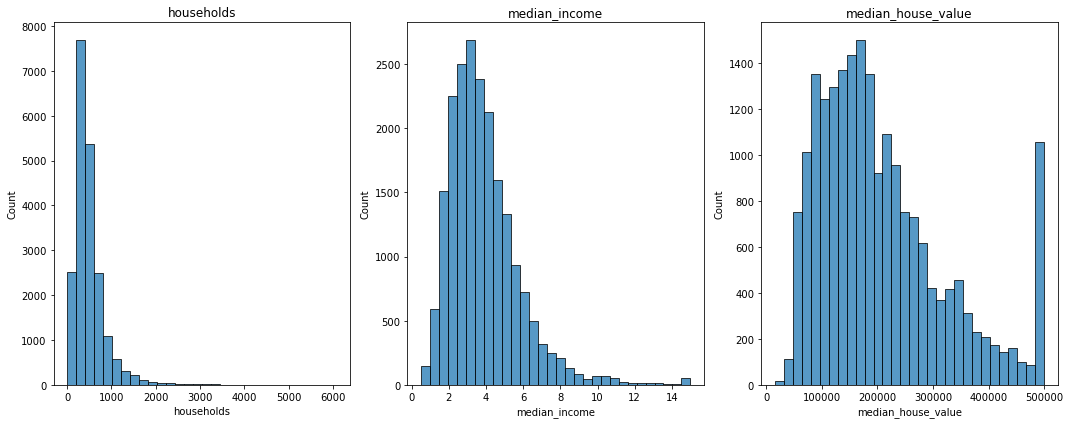

In [28]:
plots_per_row = 3

for i in range(0, len(numeric_columns), plots_per_row):
    subset = numeric_columns[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 6))

    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.histplot(data=df, x=column, bins=30, ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

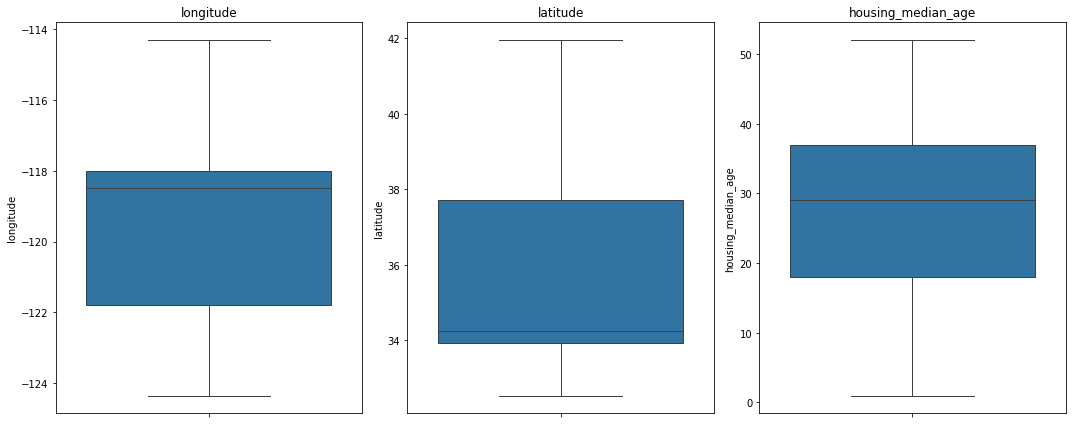

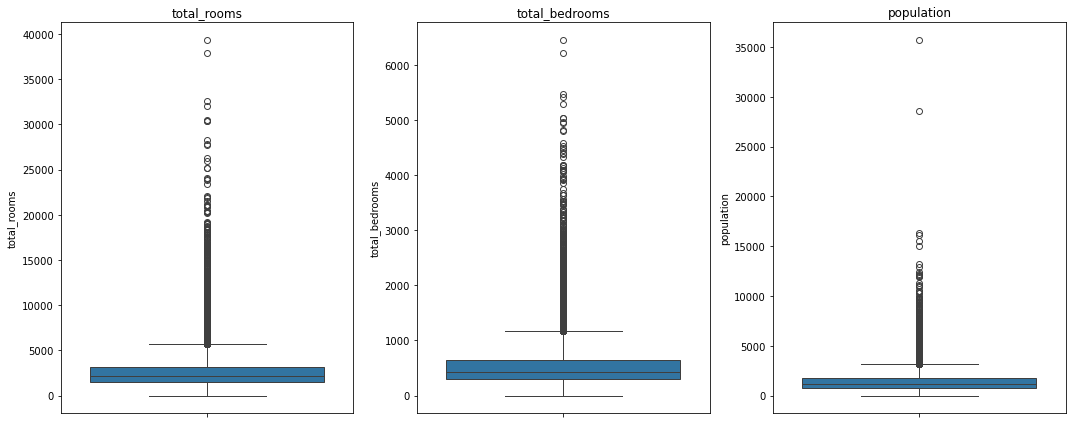

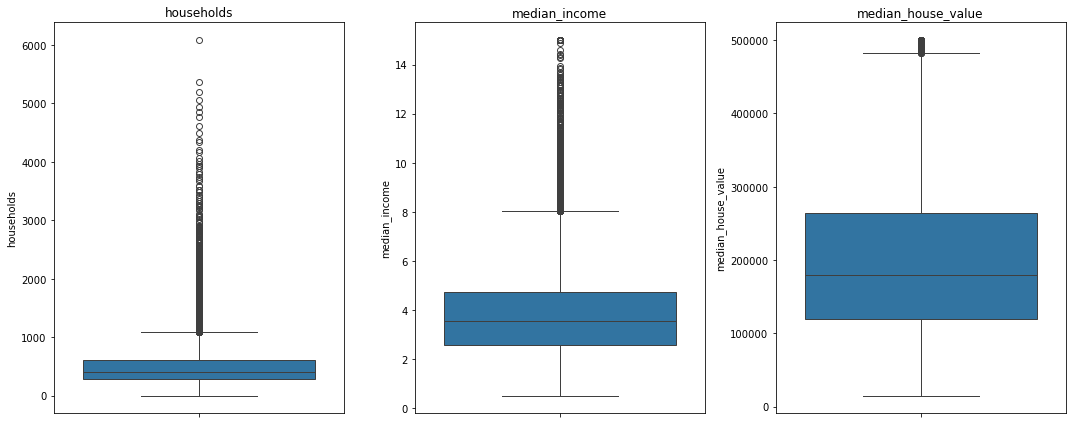

In [29]:
# Number of plots per row
plots_per_row = 3

# Loop through columns in chunks of 3
for i in range(0, len(numeric_columns), plots_per_row):
    subset = numeric_columns[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 6))
    
    # If only one plot in this row, axes is not iterable, so make it a list
    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

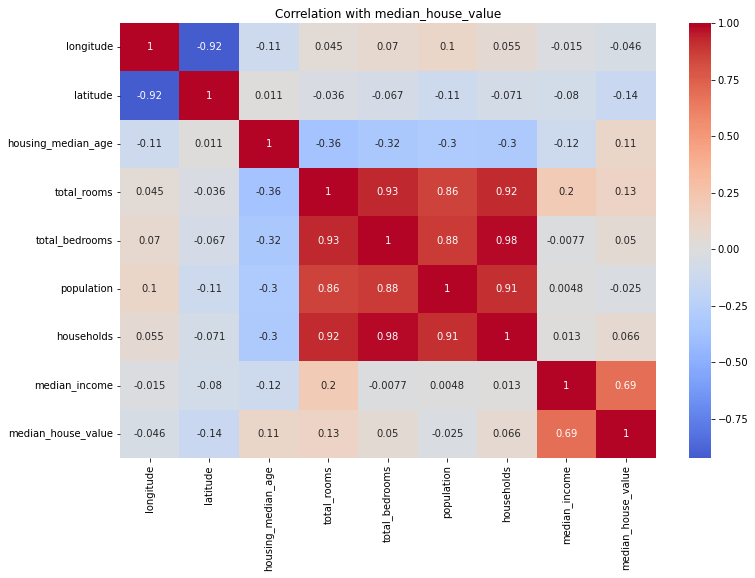

In [30]:
# Calculate correlations with the target
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation with median_house_value")
plt.show()

In [31]:
# Check Duplicate Records
df.duplicated().sum()

0

In [32]:
# Check Is Null Records
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [33]:
# Null Records Found in total_bedrooms column
df[df['total_bedrooms'].isnull()]
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [34]:
# Label Encoding
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
df['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [35]:
# Checking Outliers
outlier_columns = ['total_rooms','total_bedrooms','population','households','median_income', 'median_house_value']

for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"Outliers for {column} : {len(outliers)} / {len(df)} ({len(outliers)/len(df):.1%})")

Outliers for total_rooms : 1287 / 20640 (6.2%)
Outliers for total_bedrooms : 1306 / 20640 (6.3%)
Outliers for population : 1196 / 20640 (5.8%)
Outliers for households : 1220 / 20640 (5.9%)
Outliers for median_income : 681 / 20640 (3.3%)
Outliers for median_house_value : 1071 / 20640 (5.2%)


In [36]:
# Winsorization (Handling Outliers)
winsorize_columns = ['total_rooms','total_bedrooms','population','households','median_income', 'median_house_value']

def winsorize_iqr(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return series.clip(lower, upper)

df[winsorize_columns] = df[winsorize_columns].apply(winsorize_iqr)

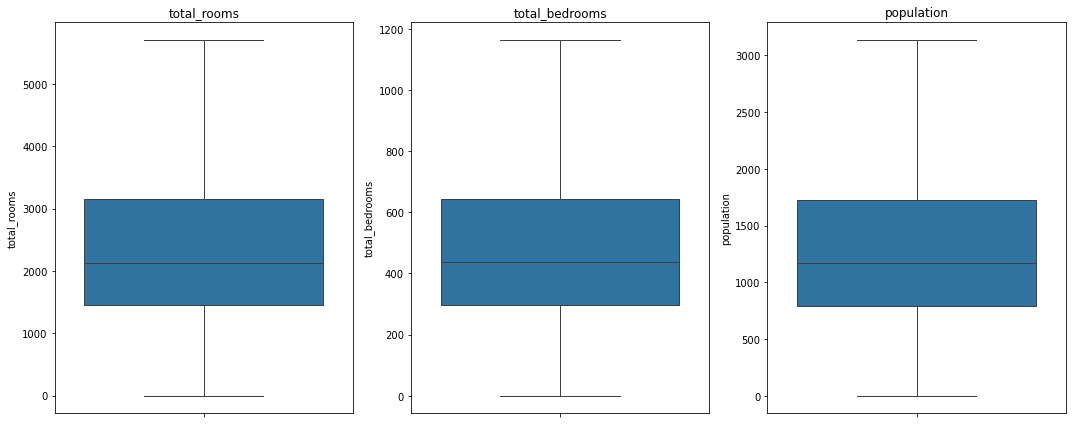

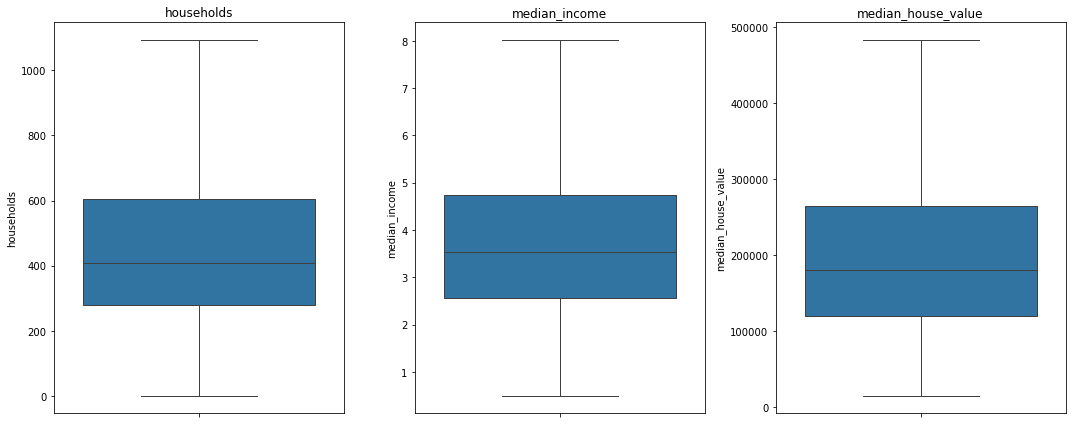

In [37]:
# Checking data after Winsorization
plots_per_row = 3

log_columns = ['total_rooms','total_bedrooms','population','households','median_income', 'median_house_value']
# Loop through columns in chunks of 3
for i in range(0, len(log_columns), plots_per_row):
    subset = log_columns[i:i + plots_per_row]
    fig, axes = plt.subplots(1, len(subset), figsize=(5 * len(subset), 6))
    
    # If only one plot in this row, axes is not iterable, so make it a list
    if len(subset) == 1:
        axes = [axes]

    for ax, column in zip(axes, subset):
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

In [38]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,3
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,3
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,3
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,3
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,3


In [39]:
# Feature and Target Selection
feature_data = df.drop(columns=["median_house_value"])
target_data = df["median_house_value"]

feature_train, feature_test, target_train, target_test = train_test_split(feature_data,target_data,test_size=0.2,random_state=42)

In [40]:
# Linear Regression Model (First Model Training)
model = LinearRegression()
model.fit(feature_train, target_train)
prediction_data = model.predict(feature_test)


# Calculate metrics
mae = mean_absolute_error(target_test, prediction_data)
mse = mean_squared_error(target_test, prediction_data)
rmse = np.sqrt(mse)  # or use mean_squared_error(..., squared=False)
r2 = r2_score(target_test, prediction_data)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 51393.00
MSE: 4813228974.41
RMSE: 69377.44
R² Score: 0.6193


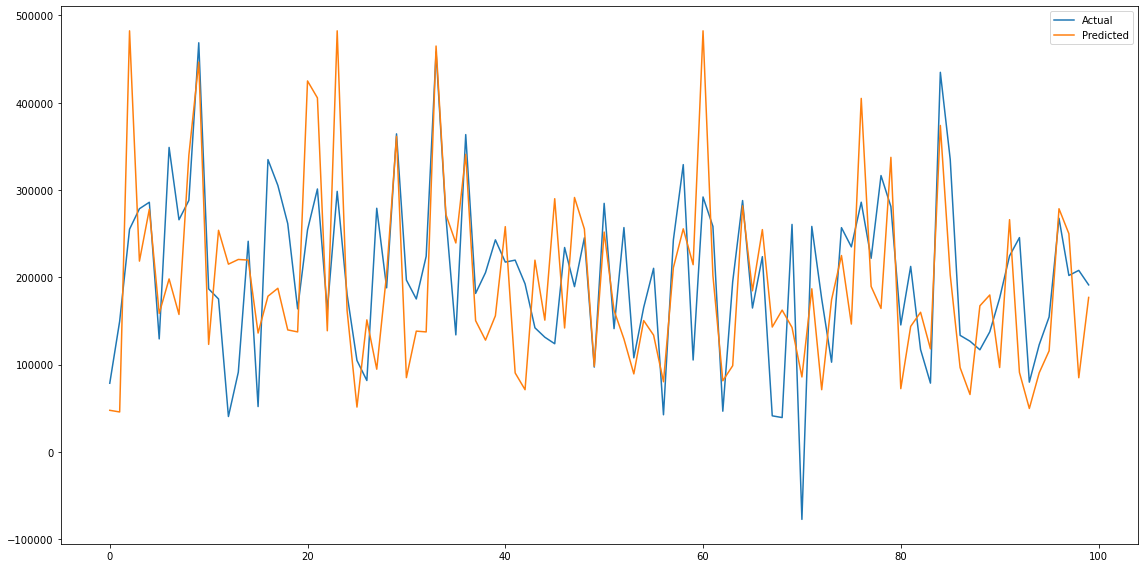

In [41]:
test = pd.DataFrame({'Predicted':prediction_data,'Actual':target_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
plt.tight_layout()
plt.show()

In [42]:
# DecisionTree Regression Model (Second Model Training)
model = DecisionTreeRegressor(max_depth=9)
model.fit(feature_train, target_train)
prediction_data = model.predict(feature_test)

# Calculate metrics
mae = mean_absolute_error(target_test, prediction_data)
mse = mean_squared_error(target_test, prediction_data)
rmse = np.sqrt(mse)  # or use mean_squared_error(..., squared=False)
r2 = r2_score(target_test, prediction_data)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 39792.83
MSE: 3495418215.40
RMSE: 59122.06
R² Score: 0.7235


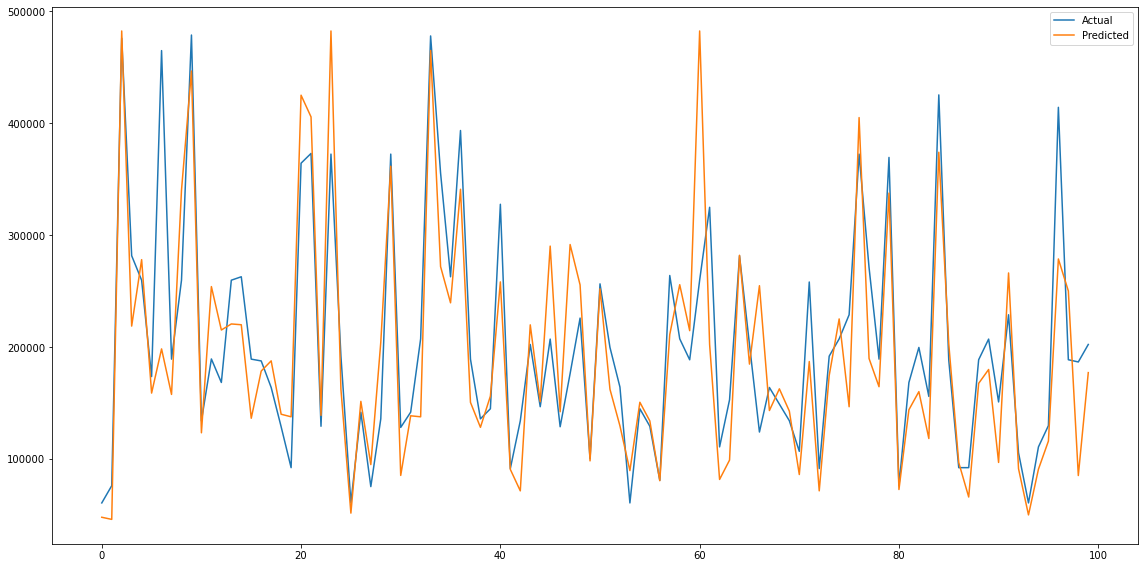

In [43]:
test = pd.DataFrame({'Predicted':prediction_data,'Actual':target_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
plt.tight_layout()
plt.show()

In [44]:
# RandomForest Regression Model (Third Model Training)
model = RandomForestRegressor(30)
model.fit(feature_train, target_train)
prediction_data = model.predict(feature_test)

# Calculate metrics
mae = mean_absolute_error(target_test, prediction_data)
mse = mean_squared_error(target_test, prediction_data)
rmse = np.sqrt(mse)  # or use mean_squared_error(..., squared=False)
r2 = r2_score(target_test, prediction_data)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 32243.79
MSE: 2465924124.51
RMSE: 49658.07
R² Score: 0.8050


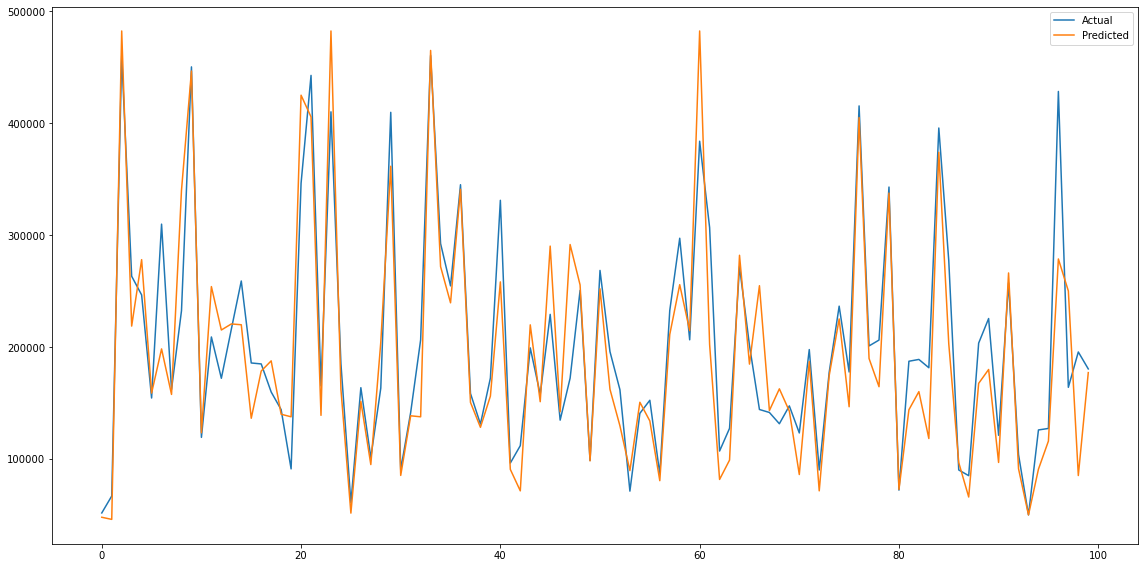

In [45]:
test = pd.DataFrame({'Predicted':prediction_data,'Actual':target_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
plt.tight_layout()
plt.show()

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [50]:
# Feature and Target Selection
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Helper function to evaluate model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"Model": name, "R2": r2, "RMSE": rmse}

In [52]:
# 2. Define models (Default versions)
models = [
    ("AdaBoost (Default)", AdaBoostRegressor(random_state=42)),
    ("GradientBoost (Default)", GradientBoostingRegressor(random_state=42)),
    ("XGBoost (Default)", xgb.XGBRegressor(objective="reg:squarederror", random_state=42))
]

In [53]:
results = []

# 3. Evaluate default models
for name, model in models:
    results.append(evaluate_model(name, model, X_train, X_test, y_train, y_test))

In [54]:
# 4. Define parameter grids for RandomizedSearchCV
param_grids = {
    "AdaBoost": {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]
    },
    "GradientBoost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.01, 0.05, 0.1, 0.2]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "subsample": [0.7, 0.8, 1.0]
    }
}

In [55]:
# 5. Hyperparameter tuning
tuned_models = [
    ("AdaBoost (Tuned)", AdaBoostRegressor(random_state=42), param_grids["AdaBoost"]),
    ("GradientBoost (Tuned)", GradientBoostingRegressor(random_state=42), param_grids["GradientBoost"]),
    ("XGBoost (Tuned)", xgb.XGBRegressor(objective="reg:squarederror", random_state=42), param_grids["XGBoost"])
]

for name, model, params in tuned_models:
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,
        scoring="r2",
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    results.append(evaluate_model(name, best_model, X_train, X_test, y_train, y_test))

In [56]:
# 6. Create DataFrame with results
results_df = pd.DataFrame(results)
results_df

,Model,R2,RMSE
0,AdaBoost (Default),0.375880,88831.837715
1,GradientBoost (Default),0.759334,55162.314728
2,XGBoost (Default),0.820505,47638.776971
3,AdaBoost (Tuned),0.555785,74943.009939
4,GradientBoost (Tuned),0.823980,47175.437299
5,XGBoost (Tuned),0.820329,47662.148339


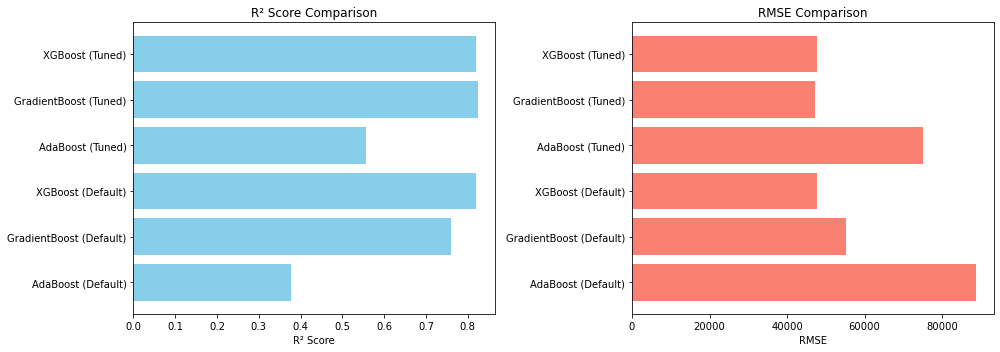

In [57]:
# 7. Plot comparison chart
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# R² score plot
ax[0].barh(results_df["Model"], results_df["R2"], color="skyblue")
ax[0].set_xlabel("R² Score")
ax[0].set_title("R² Score Comparison")

# RMSE plot
ax[1].barh(results_df["Model"], results_df["RMSE"], color="salmon")
ax[1].set_xlabel("RMSE")
ax[1].set_title("RMSE Comparison")

plt.tight_layout()
plt.show()